In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score ,r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('calories.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [3]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [4]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [5]:
df.shape

(15000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
df['Gender'] = df['Gender'].replace({'male': '0', 'female': '1'})

<Axes: >

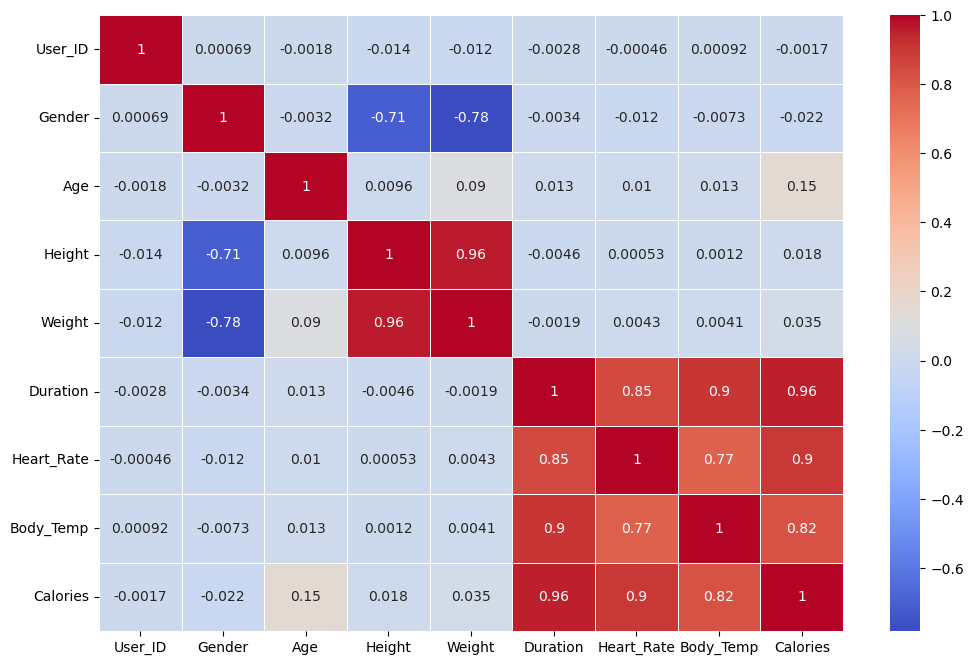

In [9]:
cor=df.corr()
plt.figure(figsize=(12,8))
sb.heatmap(cor,annot=True,linewidth=.5,cmap='coolwarm')

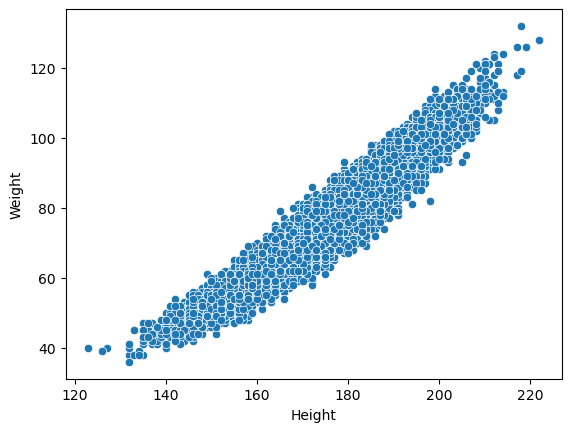

In [10]:
sb.scatterplot(x='Height', y='Weight', data=df) 
plt.show()

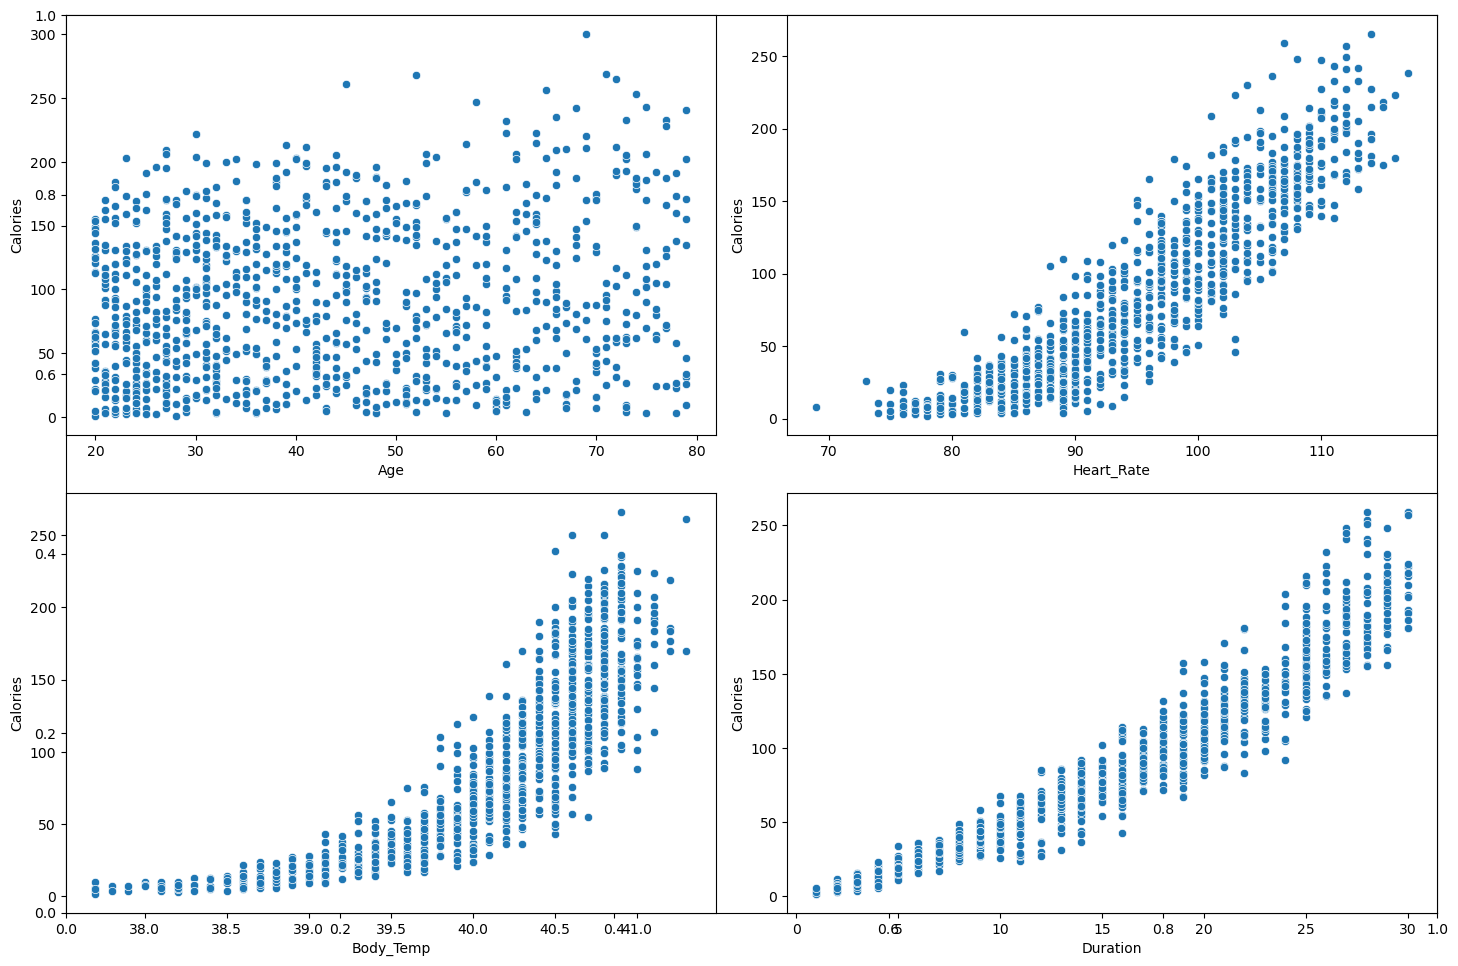

In [11]:
features = ['Age', 'Heart_Rate', 'Body_Temp', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sb.scatterplot(x=col, y='Calories', data=x)
plt.tight_layout()
plt.show()

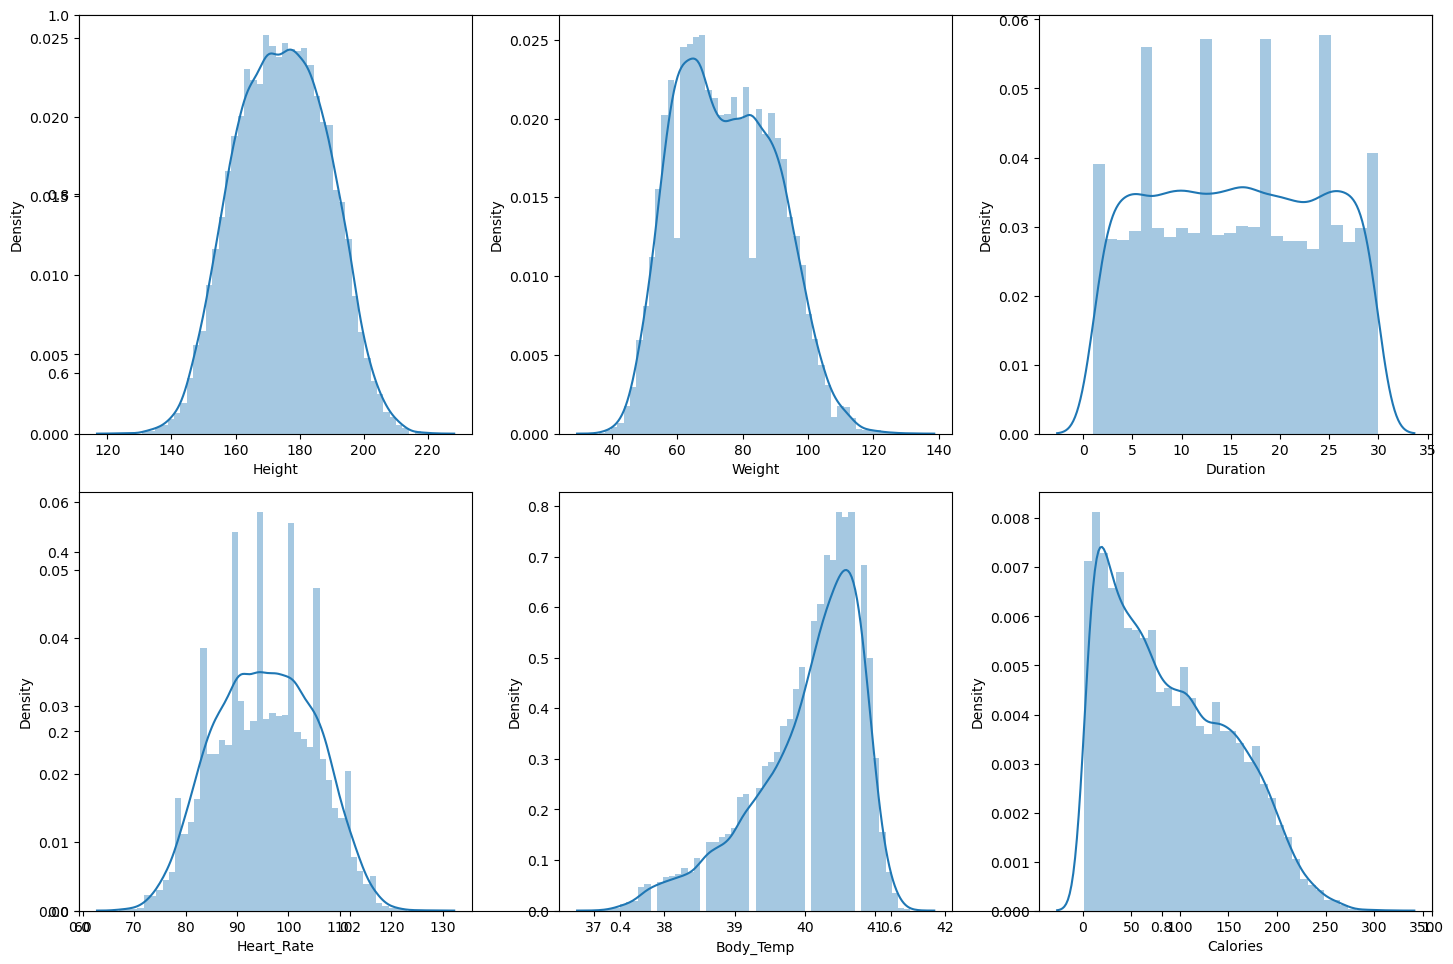

In [12]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

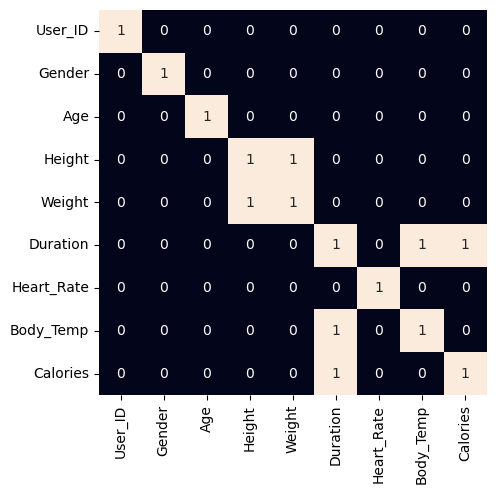

In [13]:
plt.figure(figsize=(5, 5))
sb.heatmap(df.corr() > 0.9,annot=True,cbar=False)
plt.show()

In [14]:
remove = ['Height', 'Duration']
df.drop(remove, axis=1, inplace=True)

In [15]:
df

,User_ID,Gender,Age,Weight,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,94.0,105.0,40.8,231.0
1,14861698,1,20,60.0,94.0,40.3,66.0
2,11179863,0,69,79.0,88.0,38.7,26.0
3,16180408,1,34,71.0,100.0,40.5,71.0
4,17771927,1,27,58.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...
14995,15644082,1,20,86.0,92.0,40.4,45.0
14996,17212577,1,27,65.0,85.0,39.2,23.0
14997,17271188,1,43,58.0,90.0,40.1,75.0
14998,18643037,0,78,97.0,84.0,38.3,11.0


In [16]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_test,y_train, y_test = train_test_split(features, target,test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(12000, 5) (3000, 5)
(12000,) (3000,)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:

models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    

    
    print('Training Error : ', mae(y_train, train_preds))

    y_preds = models[i].predict(X_test)
    print('Validation Error : ', mae(y_test, y_preds))
    print()

LinearRegression() : 
Training Error :  17.868614623115477
Validation Error :  18.020704884092485

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) : 
Training Error :  7.63887833458744
Validation Error :  10.408098967661461

Lasso() : 
Training Error :  17.895748206637276
Validation Error :  18.07

In [42]:
for model in models:
    model.fit(X_train, y_train)

    print(f'{model.__class__.__name__} :')

    train_preds = model.predict(X_train)
    train_mae = mae(y_train, train_preds)
    train_r2 = r2_score(y_train, train_preds)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

    val_preds = model.predict(X_test)
    val_mae = mae(y_test, val_preds)
    val_r2 = r2_score(y_test, val_preds)
    val_rmse = np.sqrt(mean_squared_error(y_test, val_preds))

    print(f'Training MAE   : {train_mae:.4f}')
    print(f'Training RMSE  : {train_rmse:.4f}')
    print(f'Training R²    : {train_r2:.4f}')
    print(f'Test MAE : {val_mae:.4f}')
    print(f'Test RMSE: {val_rmse:.4f}')
    print(f'Test R²  : {val_r2:.4f}')
    print('-' * 40)


LinearRegression :
Training MAE   : 17.8686
Training RMSE  : 22.4723
Training R²    : 0.8694
Test MAE : 18.0207
Test RMSE: 22.6957
Test R²  : 0.8724
----------------------------------------
XGBRegressor :
Training MAE   : 7.6389
Training RMSE  : 10.6581
Training R²    : 0.9706
Test MAE : 10.4081
Test RMSE: 14.5519
Test R²  : 0.9475
----------------------------------------
Lasso :
Training MAE   : 17.8957
Training RMSE  : 22.5392
Training R²    : 0.8686
Test MAE : 18.0716
Test RMSE: 22.8114
Test R²  : 0.8711
----------------------------------------
RandomForestRegressor :
Training MAE   : 3.9445
Training RMSE  : 5.5439
Training R²    : 0.9920
Test MAE : 10.6898
Test RMSE: 14.8998
Test R²  : 0.9450
----------------------------------------
Ridge :
Training MAE   : 17.8687
Training RMSE  : 22.4723
Training R²    : 0.8694
Test MAE : 18.0208
Test RMSE: 22.6958
Test R²  : 0.8724
----------------------------------------
